# ✔️ Meme competition:
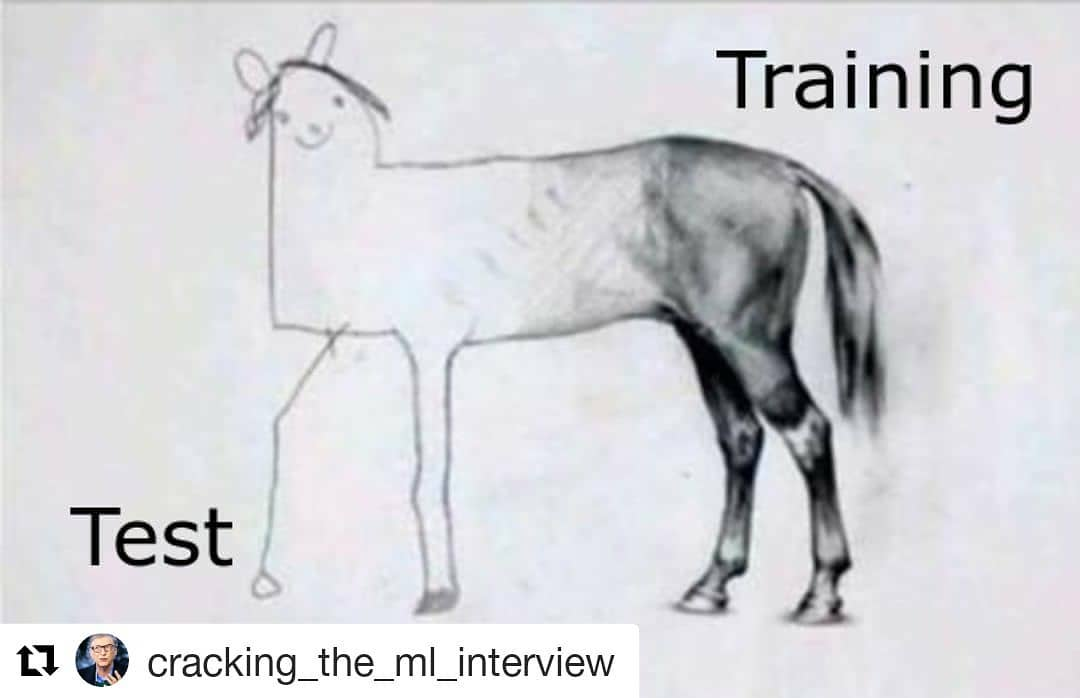

# ✔️ Problem Formulation:

**The problem:**

We have data set of wish.com products in Kaggle and we need to product ratings for these products.



**What is the input?**

The input is the verious of features e.g (price, retail_price, uses_ad_boosts, product_size, product_colour)

**What is the output?**

The output is 'rating' (range from 1 to 5) 

**What data mining function is required?**

As the goal is to predict the product rating based on other product features, the data mining function required is classification.

**What could be the challenges?**

1.   data is not clean (the data inculde missing values, and irrelevant or unnecessary features) we need a lot of preprocessing on it.
2.   It's possible that the dataset's features aren't enough to accurately predict the product rating.
3.   data is imblanced.
4.   'tags' columns need a lot of preprocessing to handle with it.
5.   find the best model and the best accuracy and change in data preprocessing








**What is the impact?**

The impact of accurately predicting the product rating is that it can help businesses understand their customer
 base and tailor their products to meet customer preferences. It can also help businesses identify the features 
that are most important to customers, they can make an educated guess about how likely people are to like your product without actually putting it on the market.

**What is an ideal solution?**

Create a machine learning model that can handle missing or noisy data and accurately predict product rating based on existing features. For organizations to understand the data well for product forecasting. And simplify the data to be clearer and get a higher accuracy.


**✔️ Model Tuning**

# Import some Modules to dealing with data set 

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# load dataset from CSV file ⏬

In [2]:
#read dataset into files 
X=pd.read_csv('/content/train_new.csv') #train dataset
Y=pd.read_csv('/content/test_new.csv') #test dataset


In [3]:
#display the first three row of the train set
X.head(3)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.0,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.0,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.0,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940


In [4]:
#display the first three row of the test set
Y.head(3)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308


# Clean the data set 🧹

In [5]:
#set variable contain 'id' column before drop it 
id=Y['id']

drop some columns ❌

In [6]:
#drop some columns 
X=X.drop(['urgency_text','theme','merchant_title','merchant_id','merchant_profile_picture','merchant_info_subtitle','currency_buyer','crawl_month','merchant_name','id','shipping_option_name','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','shipping_is_express','merchant_has_profile_picture','inventory_total','uses_ad_boosts','tags','merchant_rating_count'], axis=1)
Y=Y.drop(['urgency_text','theme','merchant_title','merchant_id','merchant_profile_picture','merchant_info_subtitle','currency_buyer','crawl_month','merchant_name','id','shipping_option_name','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','shipping_is_express','merchant_has_profile_picture','inventory_total','uses_ad_boosts','tags','merchant_rating_count'], axis=1)

Clean the 'has_urgency_banner' column

In [7]:
#Clean the 'has_urgency_banner' column with replace NAN values with 0 
#has_urgency_banner has only 1 or Nan value 
X['has_urgency_banner'] = X['has_urgency_banner'].fillna(0)
Y['has_urgency_banner'] = Y['has_urgency_banner'].fillna(0)



Clean the 'product_variation_size_id' column 👚

In [8]:
#Clean the 'product_variation_size_id' column (train set)
#Convert all values to upper case.
#Full null Value with 'CHOOSE A SIZE' Size 
#Replace any values contain  'S' (eg--> S. with S))
#repeat pervious step on 'M' 
#Replace the names of the size with their equivalent letters
X['product_variation_size_id'] = X['product_variation_size_id'].str.upper()
X['product_variation_size_id'] = X['product_variation_size_id'].fillna('CHOOSE A SIZE')
X.loc[X['product_variation_size_id'].str.contains('S'), 'product_variation_size_id'] = 'S'
X.loc[X['product_variation_size_id'].str.contains('M'), 'product_variation_size_id'] = 'M'
X['product_variation_size_id']=X['product_variation_size_id'].replace({'XXL':'2XL','XXXL':'3XL','XXXXXL':'5XL','XXXXL':'4XL','1 PC - XL':'XL','04-3XL':'3XL','32/L':'L','L.':'L','X   L':'XL'})
X.loc[~X['product_variation_size_id'].isin(['S', 'M', 'L', '2XL', 'XL', '3XL','4XL','5XL']), 'product_variation_size_id'] = 'Other'
X.product_variation_size_id.value_counts()



S        858
M        147
L         29
Other     23
XL        14
2XL       14
4XL        5
5XL        3
3XL        1
Name: product_variation_size_id, dtype: int64

In [9]:
#repeat previous steps on test data
Y['product_variation_size_id'] = Y['product_variation_size_id'].str.upper()
Y['product_variation_size_id'] = Y['product_variation_size_id'].fillna('CHOOSE A SIZE')
Y.loc[Y['product_variation_size_id'].str.contains('S'), 'product_variation_size_id'] = 'S'
Y.loc[Y['product_variation_size_id'].str.contains('M'), 'product_variation_size_id'] = 'M'
Y['product_variation_size_id']=Y['product_variation_size_id'].replace({'XXL':'2XL','XXXL':'3XL','XXXXXL':'5XL','XXXXL':'4XL','1 PC - XL':'XL','04-3XL':'3XL','32/L':'L','L.':'L'})
Y.loc[~Y['product_variation_size_id'].isin(['S', 'M', 'L', '2XL', 'XL', '3XL','4XL','5XL']), 'product_variation_size_id'] = 'Other'
Y.product_variation_size_id.value_counts()

S        362
M         67
L         22
Other     12
XL         5
2XL        5
3XL        3
4XL        2
5XL        1
Name: product_variation_size_id, dtype: int64

Clean the 'product_color' column 🎨

In [10]:
#Clean the 'product_color' column (train data)
#Convert all values to upper case.
#Full null Value with 'Unknown Color'.
#Replace any values contain  'GRAY' (eg--> LIGHTGRAY with GREY))
#repeat pervious step on rest of the values
#Replace the names of the size with their equivalent letters
X['product_color'] = X['product_color'].str.upper()
X['product_color'] = X['product_color'].fillna('Unknown_color')
X.loc[X['product_color'].str.contains('GRAY'), 'product_color'] = 'GREY'
X.loc[X['product_color'].str.contains('GREY'), 'product_color'] = 'GREY'
X.loc[X['product_color'].str.contains('BLACK'), 'product_color'] = 'BLACK'
X.loc[X['product_color'].str.contains('WHITE'), 'product_color'] = 'WHITE'
X.loc[X['product_color'].str.contains('BLUE'), 'product_color'] = 'BLUE'
X.loc[X['product_color'].str.contains('RED'), 'product_color'] = 'RED'
X.loc[X['product_color'].str.contains('GREEN'), 'product_color'] = 'GREEN'
X.loc[X['product_color'].str.contains('PINK'), 'product_color'] = 'PINK'
X.loc[X['product_color'].str.contains('YELLOW'), 'product_color'] = 'YELLOW'
X['product_color'] = X['product_color'].replace({'WINERED':'RED','NAVYBLUE':'BLUE','BEIGE':'KHAKI','IVORY':'WHITE','ROSE':'PINK','ROSEGOLD':'PINK','NAVY':'BLUE','WINE RED':'RED','BURGUNDY':'RED','VIOLET':'PURPLE','CLARET':'RED','APRICOT':'ORANGE','CAMEL':'BROWN','WINE':'RED','ARMY':'CAMOUFLAG','GOLD':'YELLOW','SILVER':'GREY'})
X['product_color'] = X['product_color'].replace({'CAMOUFLAGE':'MULTICOLOR','FLORAL':'MULTICOLOR','LEOPARD':'MULTICOLOR','LEOPARDPRINT':'MULTICOLOR','STAR':'MULTICOLOR','RAINBOW':'MULTICOLOR','CAMOUFLAG':'MULTICOLOR','COFFEE':'BROWN'})

X.product_color.value_counts()



BLACK            239
WHITE            192
BLUE             124
RED               98
GREEN             95
PINK              80
YELLOW            72
GREY              58
PURPLE            38
Unknown_color     29
MULTICOLOR        24
ORANGE            17
KHAKI             15
BROWN             12
NUDE               1
Name: product_color, dtype: int64

In [11]:
#repeat previous steps on test data
Y['product_color'] = Y['product_color'].str.upper()
Y['product_color'] = Y['product_color'].fillna('Unknown_color')
Y.loc[Y['product_color'].str.contains('GRAY'), 'product_color'] = 'GREY'
Y.loc[Y['product_color'].str.contains('GREY'), 'product_color'] = 'GREY'
Y.loc[Y['product_color'].str.contains('BLACK'), 'product_color'] = 'BLACK'
Y.loc[Y['product_color'].str.contains('WHITE'), 'product_color'] = 'WHITE'
Y.loc[Y['product_color'].str.contains('BLUE'), 'product_color'] = 'BLUE'
Y.loc[Y['product_color'].str.contains('RED'), 'product_color'] = 'RED'
Y.loc[Y['product_color'].str.contains('GREEN'), 'product_color'] = 'GREEN'
Y.loc[Y['product_color'].str.contains('PINK'), 'product_color'] = 'PINK'
Y.loc[Y['product_color'].str.contains('YELLOW'), 'product_color'] = 'YELLOW'
Y.loc[Y['product_color'].str.contains('PURPLE'), 'product_color'] = 'PURPLE'
Y.loc[Y['product_color'].str.contains('KHAKI'), 'product_color'] = 'KHAKI'
Y['product_color'] = Y['product_color'].replace({'WINERED':'RED','NAVYBLUE':'BLUE','BEIGE':'KHAKI','IVORY':'WHITE','ROSE':'PINK','ROSEGOLD':'PINK','NAVY':'BLUE','WINE RED':'RED','BURGUNDY':'RED','VIOLET':'PURPLE','CLARET':'RED','APRICOT':'ORANGE','CAMEL':'BROWN','WINE':'RED','ARMY':'CAMOUFLAG','GOLD':'YELLOW','SILVER':'GREY'})
Y['product_color'] = Y['product_color'].replace({'CAMOUFLAGE':'MULTICOLOR','FLORAL':'MULTICOLOR','LEOPARD':'MULTICOLOR','LEOPARDPRINT':'MULTICOLOR','STAR':'MULTICOLOR','RAINBOW':'MULTICOLOR','CAMOUFLAG':'MULTICOLOR','COFFEE':'BROWN','TAN':'BROWN','ORANGE & CAMOUFLAGE':'MULTICOLOR','JASPER':'MULTICOLOR'})
Y.product_color.value_counts()

BLACK            86
WHITE            84
RED              49
BLUE             44
GREEN            42
YELLOW           37
PINK             33
GREY             32
PURPLE           17
MULTICOLOR       14
Unknown_color    12
ORANGE           12
KHAKI            12
BROWN             5
Name: product_color, dtype: int64

clean 'rating data' column

In [12]:
#remove value 6.0 from 'rating' columns in train set (because the rating range from 1 to 5)
X['rating']=X['rating'].replace({6.0:5.0})

In [13]:
#check the values of 'rating'
X['rating'].value_counts()


4.0    774
5.0    171
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64

drop NAN from train set ❎

In [14]:
#drop NAN from train set
X.dropna(inplace=True)

In [15]:
#check unique values in 'origin_country' (train set)
X['origin_country'].unique()

array(['CN', 'US', 'GB', 'SG', 'VE'], dtype=object)

In [16]:
#check unique values in 'origin_country' (test set)
Y['origin_country'].unique()

array(['CN', 'US', 'AT', nan, 'VE'], dtype=object)

convert categorical columns and string columns to numeric columns using one hot encoding method. 🔢

In [17]:
#we need to concatian data because the values in train set not in test set 
df=pd.concat([X,Y])

In [18]:
#I dropped color and size columns because I found accuracy gets better
df=df.drop(['product_color','product_variation_size_id'], axis=1)

dealing with 'tags' column 💻

In [19]:
#dealing with 'tags' column (if i didn't drop it)
'''from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer(stop_words='english')

#define the column
text = df['tags']

count_matrix  = coun_vect.fit_transform(text)

count_array  =count_matrix.toarray()

l=coun_vect.get_feature_names_out()

new_tags= pd.DataFrame(data=count_array,columns =l)
new_tags.shape'''


"from sklearn.feature_extraction.text import CountVectorizer\n\ncoun_vect = CountVectorizer(stop_words='english')\n\n#define the column\ntext = df['tags']\n\ncount_matrix  = coun_vect.fit_transform(text)\n\ncount_array  =count_matrix.toarray()\n\nl=coun_vect.get_feature_names_out()\n\nnew_tags= pd.DataFrame(data=count_array,columns =l)\nnew_tags.shape"

dealing with rest of categorical data 💻


In [20]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561 entries, 0 to 478
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1561 non-null   float64
 1   retail_price                 1561 non-null   int64  
 2   units_sold                   1561 non-null   int64  
 3   rating                       1082 non-null   float64
 4   rating_count                 1561 non-null   int64  
 5   product_variation_inventory  1561 non-null   int64  
 6   shipping_option_price        1561 non-null   int64  
 7   countries_shipped_to         1561 non-null   int64  
 8   has_urgency_banner           1561 non-null   float64
 9   merchant_rating              1561 non-null   float64
 10  origin_country_AT            1561 non-null   uint8  
 11  origin_country_CN            1561 non-null   uint8  
 12  origin_country_GB            1561 non-null   uint8  
 13  origin_country_SG  

# spilt data into train set and test set again 🔀

In [21]:

train = df.iloc[:X.shape[0],:]
test = df.iloc[X.shape[0]:,:]

#drop rating column from test because orginal test set doesn't have rating column
test=test.drop(['rating'],axis=1)

#drop duplication from train set
train=train.drop_duplicates()



In [22]:
train.head()

,price,retail_price,units_sold,rating,rating_count,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_rating,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,8.00,7,10000,4.0,1670,50,3,30,0.0,4.137582,0,1,0,0,0,0
1,8.00,7,1000,4.0,843,50,3,37,0.0,4.256873,0,1,0,0,0,0
2,6.00,34,100,4.0,10,50,2,41,0.0,3.928920,0,1,0,0,0,0
3,4.67,4,100,3.0,82,5,1,25,0.0,4.079365,0,1,0,0,0,0
4,8.00,11,1000,4.0,127,50,3,15,1.0,4.306358,0,1,0,0,0,0


In [23]:
x=train.drop(['rating'],axis=1)
y=train['rating']

In [24]:
y.value_counts()

4.0    756
5.0    167
3.0    133
2.0     12
1.0      2
Name: rating, dtype: int64

In [25]:
#train test spilt
#X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)


# Feature selection 

In [26]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x, y)
mutual_info

array([0.04227447, 0.0283379 , 0.0882498 , 0.14847705, 0.01187409,
       0.04308115, 0.03742996, 0.        , 0.09233111, 0.        ,
       0.01307533, 0.        , 0.        , 0.        , 0.00775502])

In [27]:
#Selecting best 10 features (select the top 10 important features)
from sklearn.feature_selection import SelectKBest
cols = SelectKBest(mutual_info_classif, k=10)
cols.fit(x, y)
x.columns[cols.get_support()]


Index(['price', 'retail_price', 'units_sold', 'rating_count',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'merchant_rating', 'origin_country_CN',
       'origin_country_GB'],
      dtype='object')

In [28]:
X_transformed = cols.transform(x)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0, train_size = .75)


# **build the models** 🏢

# 1.Decision tree 

In [30]:
from sklearn.model_selection import GridSearchCV

#Build decision tree classifier
first_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_paras ={'max_depth': [1, 3, 5, 15, 20],'min_samples_leaf': [10, 30, 40, 50, 100],'criterion': ["entropy", "gini"]}
GridSearch_classifier_tree = GridSearchCV(first_tree_model, tree_paras, cv=5,scoring = "accuracy")


#train tree classifier
GridSearch_classifier_tree.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, 15, 20],
                         'min_samples_leaf': [10, 30, 40, 50, 100]},
             scoring='accuracy')

In [31]:
print(GridSearch_classifier_tree.best_estimator_)
print(GridSearch_classifier_tree.best_params_)
print(GridSearch_classifier_tree.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10)
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 10}
0.7456677018633541


In [32]:
newFirst_tree_model=DecisionTreeClassifier(criterion= "entropy", max_depth= 1 , min_samples_leaf= 10 , random_state= 3)
newFirst_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       random_state=3)

In [33]:
tree_score=newFirst_tree_model.score(X_train, y_train)
tree_score

0.7468827930174564

In [34]:
from sklearn.metrics import accuracy_score

#Test the accuracy of model on test set

Y_pred = newFirst_tree_model.predict(X_test)



print(accuracy_score(y_test, Y_pred))

print(f1_score(y_test, Y_pred, average='weighted'))

0.746268656716418
0.6637870828738809


In [35]:
Y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [36]:
y_train.unique

<bound method Series.unique of 264     4.0
529     4.0
756     4.0
151     4.0
1000    4.0
       ... 
1057    4.0
777     4.0
852     4.0
569     4.0
695     3.0
Name: rating, Length: 802, dtype: float64>

In [39]:
feature=['price', 'retail_price', 'units_sold', 'rating_count',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'merchant_rating', 'origin_country_CN',
       'origin_country_GB']

In [40]:
pred_test = newFirst_tree_model.predict(test[feature])
pred_df = pd.DataFrame(data={'id': id, 'rating': pred_test})

pred_df.to_csv('pred_walkthrough.csv', index=False)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [41]:
pred_test

array([5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4.

# 2.Decision tree

In [42]:
from sklearn import preprocessing

#Build decision tree classifier
secound_tree_model = DecisionTreeClassifier(criterion="gini", max_depth=10,random_state=10)

#train tree classifier
secound_tree_model=secound_tree_model.fit(X_train,y_train)

In [43]:
#Test the accuracy of model 

Y_pred2 = secound_tree_model.predict(X_test)

print(accuracy_score(y_test, Y_pred2))

print(f1_score(y_test, Y_pred2, average='weighted'))

0.7425373134328358
0.7301193676691962


In [44]:
Y_pred2

array([3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       3., 5., 4., 5., 4., 4., 4., 3., 4., 5., 4., 4., 3., 4., 3., 4., 4.,
       3., 4., 4., 4., 4., 3., 3., 5., 4., 4., 3., 3., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 5., 3., 4., 4., 4., 4., 4., 5., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 1., 4., 3., 4., 4., 4., 4., 4., 4., 3., 4.,
       4., 3., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 5., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 4.,
       5., 4., 4., 4., 5., 4., 4., 4., 2., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 3., 3., 4., 5., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 3., 5.

In [45]:
pred_test = secound_tree_model.predict(test[feature])
pred_df = pd.DataFrame(data={'id': id, 'rating': pred_test})

pred_df.to_csv('pred_walkthrough.csv', index=False)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [46]:
pred_test

array([5., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 5., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 5., 4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 5., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 3., 4., 4., 3., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 5., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 5., 4., 4., 4.

# 1.SVM

In [47]:
#Build  SVM classifier

first_svm_model = SVC(kernel = 'rbf',degree=3, random_state = 0)

#train SVM classifier

first_svm_model=first_svm_model.fit(X_train, y_train)


In [48]:
Y_pred3 = first_svm_model.predict(X_test)

print(accuracy_score(y_test, Y_pred3))

print(f1_score(y_test, Y_pred3, average='weighted'))

0.7089552238805971
0.5882161246170892


2.SVM

In [49]:
#Build  SVM classifier

Secound_svm_model = SVC(kernel ='poly',degree=2, random_state = 5)

#train SVM classifier

Secound_svm_model=Secound_svm_model.fit(X_train, y_train)

In [50]:
Y_pred4 = Secound_svm_model.predict(X_test)

print(accuracy_score(y_test, Y_pred4))

print(f1_score(y_test, Y_pred4, average='weighted'))

0.7089552238805971
0.5882161246170892


# Naïve Bayes

In [61]:
#Build  Naïve Bayes classifier

Naïve_Bayes_model = MultinomialNB(force_alpha=True)

#train Naïve Bayes classifier

Naïve_Bayes_model.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [62]:
Y_pred5 = Naïve_Bayes_model.predict(X_test)

print(accuracy_score(y_test, Y_pred5))

print(f1_score(y_test, Y_pred5, average='weighted'))

0.2462686567164179
0.32785444254828405


the Accuracy is very poor in this model and this is because if there is a categorical variable of a category that wasn't present in the training data set, the Naive Bayes model will assign it zero probability and won't be able to make any predictions in this regard

**The best solution is the decision tree model**

#✔️ Answer the questions:


🌈 **Why Data Mining is a misnomer? What is another preferred name?**


*   data mining is considered a misnomer because we are not searching for data itself, we already have it, data mining is dedicated to extracting knowledge and patterns from massive data.
*   the other preferred name is Knowledge discovery from databases (KDD).





🌈 **What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?**


*   it's a nontrivial process of identifying valid, novel, potentially useful, meaningful knowledge and ultimately understandable patterns in data, and emphasizes the "high-level" application of particular data mining methods

*   

1.   Data Engineers collect relevant Data. They move and transform this data into “pipelines” for the Data Science team. They could use programming languages and they Responsible for building, testing, and maintaining architectures and delivering task-relevant data from source to destination

2.   Data Scientists analyze, clean, test, aggregate, optimize the data and present it to the company. They interpret the non-meaningful data using some mathematical and statistical methods.






🌈 **In data mining, what is the difference between prediction and categorization**?


*   With the prediction, we need to predict the dataset's unavailability or missing value and the accuracy relies on how well you guess the value for new data. (eg.the price of a new house and it's mostly used to predict the value of something in the future.)
*   categorization is done through the use of classification based on similarities and category identification, it determines discrete value of objects whose class label is classify these observations into their right categories (eg. animal type)



🌈 **Why data science/machine learning is a bad idea in the context of information security?**


*   Because data science is a data-driven methodology, it depends on the data to work, which may raise the risk of a data breach and fine. As a result, you run the risk of developing a poor model or feeding incorrect data to your model. You must also respect laws regarding data privacy.



🌈 **What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**


*   A simple but widely-applicable security model is the CIA triad; which stands for Confidentiality, Integrity, and Availability; three key principles that should be guaranteed in any kind of secure system. This principle is applicable across the whole subject of Security Analysis, from access to a user's internet history to security of encrypted data across the internet. If any one of the three can be breached it can have serious consequences for the parties concerned.we can use it in our AI pipelines to ensure that AI pipelines follow CIA guidelines or to check what is the type of attacks that we are under and fix the situation quickly.




